In [527]:
# import libraries
from matplotlib import pyplot as plt
from matplotlib.axis import Axis
import pandas as pd
import seaborn as sns
import numpy as np

In [528]:
# read in world cup data and examine data
wc2022 = pd.read_csv('Fifa_WC_2022_Match_data.csv', encoding='latin1')
print(wc2022.head())
print(wc2022.dtypes)

   match_no day_of_week       date   hour                          venue  \
0         1         Sun  20-Nov-22  17:00                Al Bayt Stadium   
1         2         Mon  21-Nov-22  14:00  Khalifa International Stadium   
2         3         Mon  21-Nov-22  17:00             Al Thumama Stadium   
3         4         Mon  21-Nov-22  20:00          Ahmed bin Ali Stadium   
4         5         Tue  22-Nov-22  11:00          Lusail Iconic Stadium   

                         referee    group              1             2  \
0                 Daniele Orsato  Group A          QATAR       ECUADOR   
1                  Raphael Claus  Group B        ENGLAND          IRAN   
2                 Wilton Sampaio  Group A        SENEGAL   NETHERLANDS   
3  Abdulrahman Ibrahim Al Jassim  Group B  UNITED STATES         WALES   
4                  Slavko Vincic  Group C      ARGENTINA  SAUDI ARABIA   

   attendance  ...  1_panelties_scored  2_panelties_scored  1_goal_prevented  \
0       67372  ...

In [529]:
# Rename incorrect or unclear columns names
wc2022 = wc2022.rename(columns={'faul_against_1': 'foul_against_1', 'faul_against_2': 'foul_against_2', 
                                '1_panelties_scored':'1_penalties_scored', '2_panelties_scored':'2_penalties_scored',
                               '1': 'team1', '2': 'team2'})
wc2022.dtypes

match_no                             int64
day_of_week                         object
date                                object
hour                                object
venue                               object
referee                             object
group                               object
team1                               object
team2                               object
attendance                           int64
1_xg                               float64
2_xg                               float64
1_poss                               int64
2_poss                               int64
1_goals                              int64
2_goals                              int64
score                               object
1_attempts                           int64
2_attempts                           int64
1_conceded                           int64
2_conceded                           int64
1_goal_inside_penalty_area           int64
2_goal_inside_penalty_area           int64
1_goal_outs

In [530]:
# Check for any rows with null values
wc2022[pd.isnull(wc2022).any(axis=1)]

,match_no,day_of_week,date,hour,venue,referee,group,team1,team2,attendance,...,1_penalties_scored,2_penalties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied


In [531]:
# Start off with some descriptive statistics
wc2022.describe(include='all')

,match_no,day_of_week,date,hour,venue,referee,group,team1,team2,attendance,...,1_penalties_scored,2_penalties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied
count,60.000000,60,60,60,60,60,60,60,60,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
unique,NaN,7,19,5,8,29,10,32,32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Tue,29-Nov-22,20:00,Al Bayt Stadium,Wilton Sampaio,Round of 16,NETHERLANDS,SENEGAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10,4,22,8,4,8,4,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,30.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51898.150000,...,0.116667,0.100000,11.650000,11.133333,0.016667,0.016667,71.450000,70.033333,288.783333,293.416667
std,17.464249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16192.926981,...,0.323732,0.302532,6.075304,4.969284,0.129099,0.129099,14.632707,12.886686,91.113654,81.517034
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39089.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,38.000000,44.000000,139.000000,141.000000
25%,15.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42051.000000,...,0.000000,0.000000,7.750000,8.000000,0.000000,0.000000,63.000000,60.250000,226.000000,233.750000
50%,30.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43983.500000,...,0.000000,0.000000,11.000000,10.000000,0.000000,0.000000,70.000000,72.500000,275.500000,293.500000
75%,45.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61051.500000,...,0.000000,0.000000,14.250000,14.000000,0.000000,0.000000,82.250000,79.000000,328.250000,327.500000


In [532]:
# create variable for total goals scored per game
wc2022['total_goals'] = wc2022['1_goals'] + wc2022['2_goals']

# determine which game had the highest number of total goals
wc2022[wc2022['total_goals']==wc2022['total_goals'].max()]

,match_no,day_of_week,date,hour,venue,referee,group,team1,team2,attendance,...,2_penalties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied,total_goals
1,2,Mon,21-Nov-22,14:00,Khalifa International Stadium,Raphael Claus,Group B,ENGLAND,IRAN,45334,...,1,8,13,0,0,63,72,139,416,8


In [533]:
# investigate group variable
wc2022.group.unique()

array(['Group A', 'Group B', 'Group C', 'Group D', 'Group F', 'Group E',
       'Group G', 'Group H', 'Round of 16', 'Quarter-final'], dtype=object)

In [534]:
# create round variable
rounds_list = []
for row in wc2022.group:
    if row.startswith('Group '):
        rounds_list.append('Group play')
    else:
        rounds_list.append(row)
wc2022['rounds'] = rounds_list

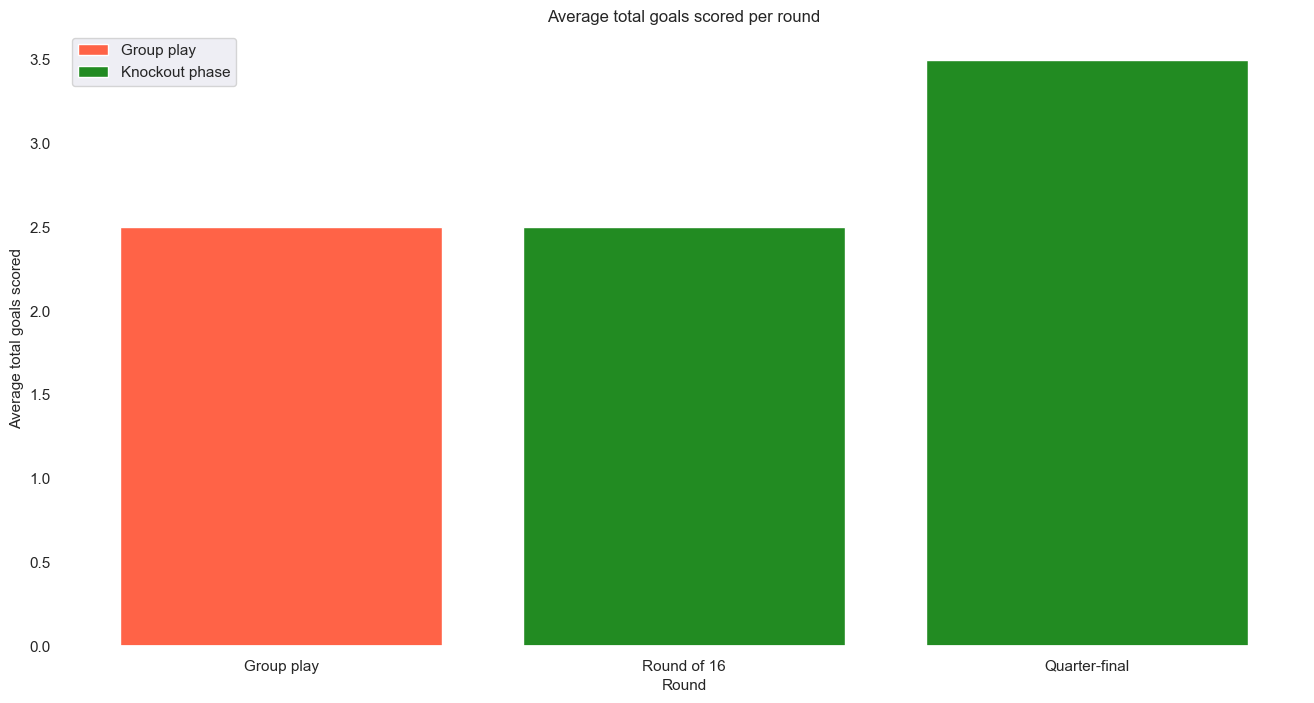

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

In [535]:
# Illustrate average number of total goals score per type of round
ax = plt.subplot()

# show group play bar as first bar
plt.bar(0, wc2022.groupby('rounds').mean('total_goals')['total_goals'][0],
       color = 'tomato', label = 'Group play')

# show remaining bars as knockout rounds
plt.bar(range(1, 1 + len(wc2022.rounds.unique()[1:])), 
        wc2022.groupby('rounds').mean('total_goals')['total_goals'][1:],
        color = 'forestgreen', label = 'Knockout phase')
plt.xlabel('Round', size=11)
plt.ylabel('Average total goals scored', size=11)
plt.title('Average total goals scored per round')
plt.legend(labels)
ax.set_xticks(range(len(wc2022.groupby('rounds'))))
ax.set_xticklabels(wc2022.rounds.unique())
ax.set_facecolor("white")
plt.figure(facecolor='white')
plt.show()
plt.clf()

In [536]:
# create teams-level dataframe 
teams = pd.DataFrame({'games_played': wc2022.team1.value_counts(),
                     'total_goals': wc2022.groupby(['team1'])['1_goals'].sum().sort_index() + 
                      wc2022.groupby('team2')['2_goals'].sum().sort_index(),
                     'total_goals_prevented': wc2022.groupby(['team1'])['1_goal_prevented'].sum().sort_index() + 
                      wc2022.groupby('team2')['2_goal_prevented'].sum().sort_index(),
                     'expected_goals': wc2022.groupby(['team1'])['1_xg'].sum().sort_index() + 
                      wc2022.groupby('team2')['2_xg'].sum().sort_index()})
teams['diff_actual_expected'] = teams.total_goals - teams.expected_goals
print(teams)

                games_played  total_goals  total_goals_prevented  \
ARGENTINA                  3            9                     22   
AUSTRALIA                  1            4                     63   
BELGIUM                    2            1                     43   
BRAZIL                     3            8                     34   
CAMEROON                   2            4                     44   
CANADA                     1            2                     29   
COSTA RICA                 1            3                     63   
CROATIA                    3            6                     65   
DENMARK                    1            1                     40   
ECUADOR                    1            4                     22   
ENGLAND                    4           13                     45   
FRANCE                     3           11                     46   
GERMANY                    1            6                     27   
GHANA                      1            5       

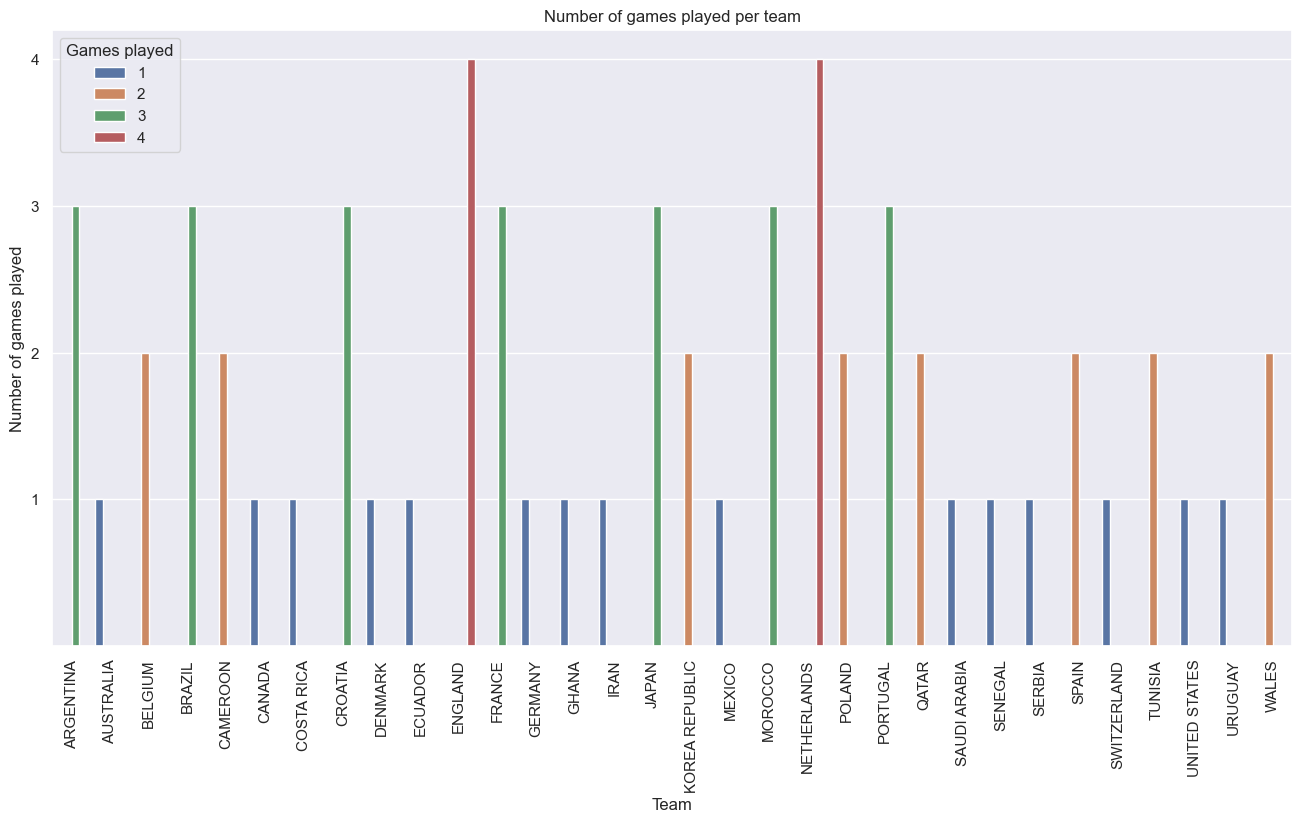

<Figure size 1600x800 with 0 Axes>

In [537]:
# Illustrate total games played per team
ax2 = sns.barplot(data=teams, x=teams.index, y="games_played", hue='games_played')
sns.set(rc={'figure.figsize':(16,8)})
ax2.set_xlabel('Team')
ax2.set_ylabel('Number of games played')
ax2.set_title('Number of games played per team')
ax2.tick_params(axis='x', rotation=90)
ax2.set_yticks(range(1,1+teams.games_played.max()))
ax2.legend(title='Games played', loc='upper left')
# sns.set(rc={'axes.facecolor':'lavenderblush', 'figure.facecolor':'mistyrose'})
plt.show()
plt.clf()

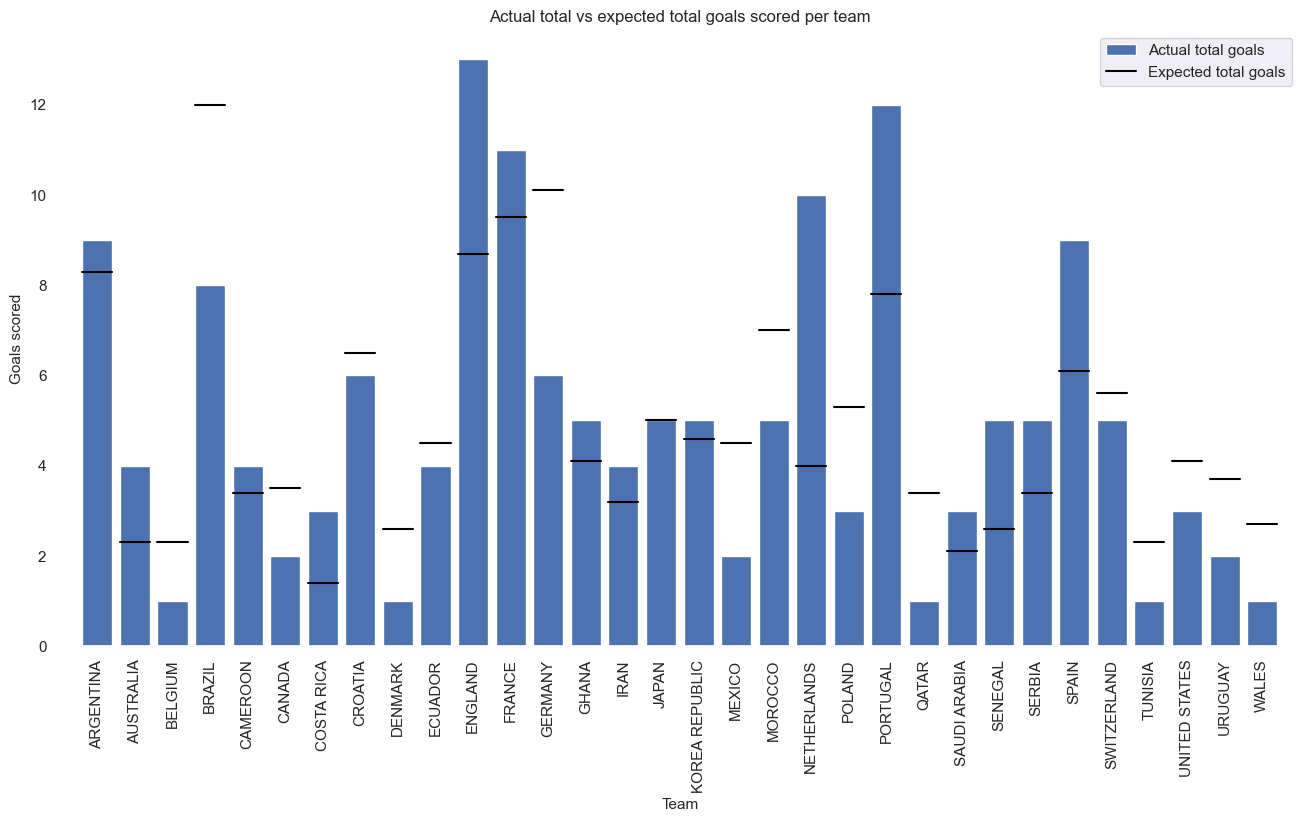

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

In [538]:
# Illustrate expected total goals vs actual total goals
ax3 = plt.subplot()

bars = plt.bar(range(len(teams.index)), teams.total_goals, label = 'Actual total goals')
plt.xlim([-1, 32])
for i in range(len(teams.index)):
    line = plt.axhline(y=teams.expected_goals[i], xmin=(i+0.6)/33, xmax=(i+1.4)/33,
                       color='black', label = 'Expected total goals')
plt.xlabel('Team', size=11)
plt.ylabel('Goals scored', size=11)
plt.title('Actual total vs expected total goals scored per team')
plt.legend(handles = [bars, line], labels=['Actual total goals', 'Expected total goals'])
ax3.set_xticks(range(len(teams.index)))
ax3.set_xticklabels(teams.index)
ax3.tick_params(axis='x', rotation=90)
ax3.set_facecolor("white")
plt.figure(facecolor='blue')
plt.show()
plt.clf()